Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Ad

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\s

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\s

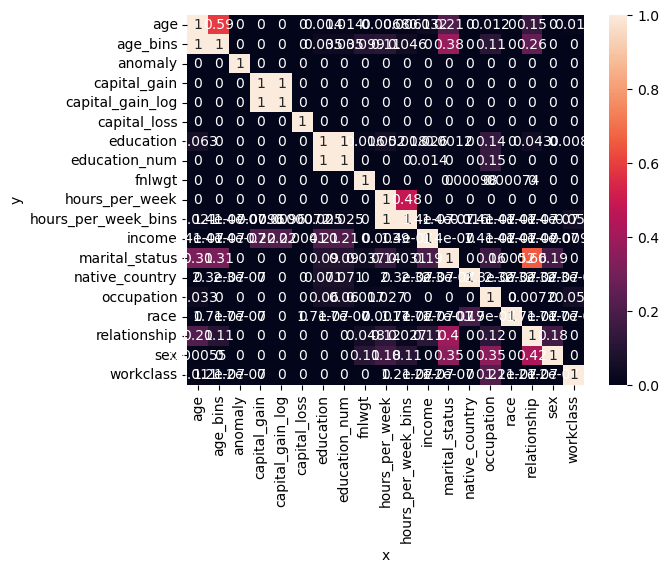

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2328\3037886007.py:92: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_no_outliers.corr()


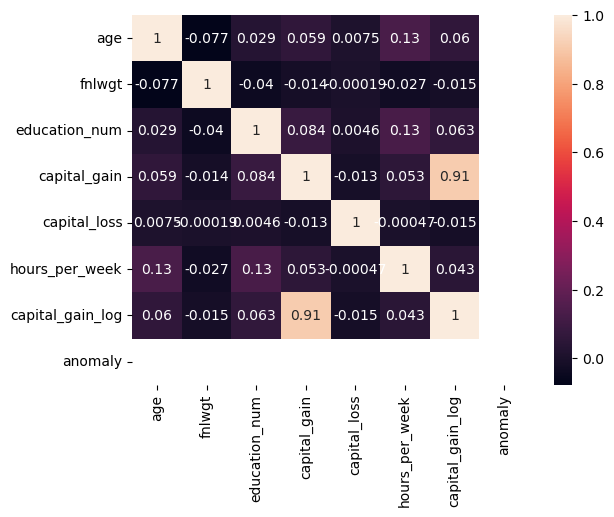

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

# Check the column names
print(df.columns)

# Rename columns to match the expected names
df.rename(columns={'hours-per-week': 'hours_per_week', 'capital-gain': 'capital_gain'}, inplace=True)

# Check the column names after renaming
print(df.columns)

# 1. Data Exploration and Preprocessing
# Basic Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Handling missing values
df = df.dropna()

# Scaling techniques
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df_standard_scaled[numerical_features])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df_minmax_scaled[numerical_features])

# Discuss the scenarios where each scaling technique is preferred
# Standard Scaling is preferred when data follows a Gaussian distribution
# Min-Max Scaling is preferred when we want to normalize the data between a certain range (e.g., 0 to 1)

# 2. Encoding Techniques
categorical_features = df.select_dtypes(include=['object']).columns

# One-Hot Encoding for categorical variables with less than 5 categories
df_ohe = df.copy()
for col in categorical_features:
    if df[col].nunique() < 5:
        df_ohe = pd.get_dummies(df_ohe, columns=[col])

# Label Encoding for categorical variables with more than 5 categories
df_le = df.copy()
label_encoder = LabelEncoder()
for col in categorical_features:
    if df[col].nunique() >= 5:
        df_le[col] = label_encoder.fit_transform(df_le[col])

# Discuss the pros and cons of One-Hot Encoding and Label Encoding
# One-Hot Encoding: Pros - No ordinality introduced, suitable for non-ordinal categories. Cons - Increases dimensionality.
# Label Encoding: Pros - Keeps dimensionality same, suitable for ordinal categories. Cons - Introduces ordinality.

# 3. Feature Engineering
# Creating new features
# Check the correct column names before proceeding
print(df.columns)

# Make sure to use the correct column names
df['age_bins'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['young', 'middle_aged', 'senior'])
df['hours_per_week_bins'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['part_time', 'full_time', 'over_time', 'extreme'])

# Log transformation on skewed feature
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# 4. Feature Selection
# Isolation Forest for outlier detection
iso = IsolationForest(contamination=0.1)
df['anomaly'] = iso.fit_predict(df[numerical_features])
df_no_outliers = df[df['anomaly'] == 1]

# PPS for feature relationships
pps_matrix = pps.matrix(df_no_outliers).pivot(columns='x', index='y', values='ppscore')
sns.heatmap(pps_matrix, annot=True)
plt.show()

# Correlation Matrix
corr_matrix = df_no_outliers.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Compare PPS and correlation matrix findings
